In [1]:
import os
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import sys
sys.path.insert(0,'C:\\Users\\raul\\Documents\\workspace\\MAI\\Riskconcile\\riskconcile')
from tools.evaluation_pipeline import run_experiments, first_batch_experiment, run_iterations_experiment
from tools.models import global_and_local, differential_ev, least_square_trf
from tools.ann import Ann, Calnet

# First Experiment

In [2]:
def get_data_series(folder):
    folders = os.listdir(path=folder)
    folders = sorted(folders,key=lambda x: int(x[:][6:]))
    dfs=[]
    for fold in folders:
        dfs.append(pd.read_csv(folder+fold+'/results.csv'))
    df = pd.concat(dfs)
    means_df = df.loc[0]
    std_df = df.loc[1]
    means_df.reset_index(inplace=True)
    means_df.drop(['Unnamed: 0','index'],axis=1,inplace=True)
    std_df.reset_index(inplace=True)
    std_df.drop(['Unnamed: 0','index'],axis=1,inplace=True)
    return means_df, std_df, folders

In [3]:
def cap_values(vals,cap=1):
    if vals[0]>cap:
        vals[0]=0
    for i in range(1,len(vals)-1):
        if vals[i]>cap:
            print(vals)
            vals[i] = (vals[i-1] + vals[i+2])/2
    return vals

In [4]:
import matplotlib.pyplot as plt
import numpy as np
def plot_that(dat,ith=0):
    means_df,std_df, folders = dat
    x = means_df.index.values[ith:]
    y = means_df.MSE.values[ith:]
    e = std_df.MSE.values[ith:]

    plt.errorbar(x, y, e, fmt='-o')
    fig = plt.xticks(ticks=means_df.index.values,labels=list(map(lambda x: (x[:][6:]),folders)))
    plt.xlabel('Number of entries used in the training')
    plt.ylabel('MSE')
#     plt.savefig('../thesis/figures/diff_ev/rows_needed_train.png')

In [5]:
import matplotlib.pyplot as plt
import numpy as np
def plot_time(dat, lim = 1):
    means_df,std_df, folders = dat
    col = 'time'

    x = means_df.index.values[:-lim]
    y = means_df[col].values[:-lim]
    e = std_df[col].values[:-lim]

    plt.errorbar(x, y, e, fmt='-o')
    fig = plt.xticks(ticks=means_df.index.values,labels=list(map(lambda x: (x[:][6:]),folders)))
    plt.xlabel('Number of entries used in the training')
    plt.ylabel(col+' (seconds)')
#     plt.savefig('../thesis/figures/diff_ev/timerows_needed.png')

In [6]:
folder0 = '../results_iter/2020-05-28--15-32-02_diffev/'
# folder2 = '../results_iter/2020-05-28--14-57-41_ANNb2/'
# folder8 = '../results_iter/2020-05-28--15-04-15_ANNb8/'
d1 = get_data_series(folder0)
# d2 = get_data_series(folder2)
# d3 = get_data_series(folder8)

C:\ProgramData\Anaconda3\envs\ratulz\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


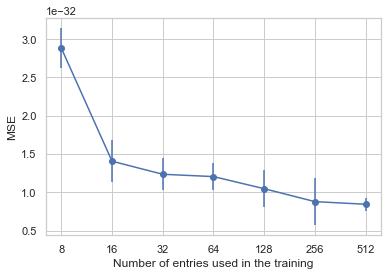

In [7]:
plot_that(d1,0)

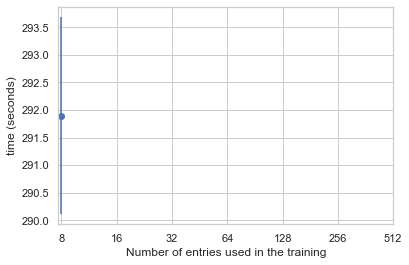

In [8]:
plot_time(d1,6)

# Second Experiment

In [74]:
folder = '../results/2020-05-29--15-11-46_diffev/'

In [75]:
df = pd.read_csv(folder + '/firstB/results.csv')
df_lat = df.rename(columns={'Unnamed: 0':'{}', 'time':'Time', 'cal_error':'Calibration Error',
                            'cal_func_evals': 'Function \newline Evaluations'})

In [76]:
print(df_lat.to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
   \{\} &           MSE &          MAPE &           MAE &         Time &  Calibration Error &  Function \textbackslash newline Evaluations \\
\midrule
 mean &  1.258497e-32 &  5.259092e-15 &  8.233761e-17 &  1248.058414 &       2.385344e-33 &                       250256.0 \\
  std &  2.932618e-33 &  8.044010e-16 &  1.205342e-17 &     3.636382 &       3.458081e-34 &                            0.0 \\
\bottomrule
\end{tabular}



In [60]:
folders = [x for x in os.listdir(path=folder) if '_' in x]

In [61]:
mean_ass = []
std_ass = []
for fold_ass in folders:
    fold_dayz = os.listdir(path=folder+fold_ass)
    dfs=[]
    for fold_final in fold_dayz:
        dfs.append(pd.read_csv(folder+fold_ass+'/'+fold_final+'/results.csv'))
    dayz_df = pd.concat(dfs)
    means_df = dayz_df.loc[0]
    std_df = dayz_df.loc[1]
    means_df.reset_index(inplace=True)
    means_df.drop(['Unnamed: 0','index'],axis=1,inplace=True)
    std_df.reset_index(inplace=True)
    std_df.drop(['Unnamed: 0','index'],axis=1,inplace=True)
    mean_ass.append(means_df)
    std_ass.append(std_df)
    

C:\ProgramData\Anaconda3\envs\ratulz\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\ProgramData\Anaconda3\envs\ratulz\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\ProgramData\Anaconda3\envs\ratulz\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Program

In [62]:
agg_df = []
for tmean in mean_ass:
    agg_df.append(tmean.agg(['mean']))
agg_df = pd.concat(agg_df)
agg_df['Asset'] = [x[7:] for x in folders]
agg_df = agg_df[['Asset']+list(agg_df.columns[:-1])]
agg_df.rename(columns={'cal_error':'Calibration \newline Error',
                       'cal_func_evals': 'Function \newline Evaluaions'}, inplace=True)

In [63]:
aggx2 = agg_df.agg(['mean','std'])
aggx2['Asset'] = ['Mean','Std']
fina_2ndex = pd.concat([agg_df,aggx2])

In [64]:
print(fina_2ndex.to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
 Asset &       MSE &      MAPE &       MAE &       time &  Calibration \textbackslash newline Error &  Function \textbackslash newline Evaluaions \\
\midrule
  AAPL &  0.115841 &  0.126603 &  0.252858 &  64.533148 &                    0.085358 &                  12751.777778 \\
  AMZN &  5.203500 &  0.090922 &  1.501497 &  80.985594 &                    3.918494 &                  16173.929825 \\
 BRK-B &  0.220166 &  0.181914 &  0.381332 &  77.746834 &                    0.229470 &                  17585.568627 \\
    FB &  0.101187 &  0.103379 &  0.202852 &  64.943388 &                    0.061284 &                  12841.733333 \\
  GOOG &  5.497620 &  0.134633 &  1.644847 &  69.910935 &                    3.506236 &                  13677.523810 \\
 GOOGL &  5.267021 &  0.113437 &  1.689231 &  70.864552 &                    3.687254 &                  13683.301587 \\
   JNJ &  0.075719 &  0.139016 &  0.203442 &  79.104658 &                    0.074

In [65]:
train_data = pd.read_csv('../data/second_batch/train.csv')
train_q = train_data[['eu_price','underlying']].groupby('underlying').quantile([.25,.75])
train_q = train_q.reset_index().pivot(index='underlying',columns='level_1',values='eu_price')
train_q['iqr'] = train_q[0.75]-train_q[0.25]
fina_2ndex.set_index('Asset',inplace=True)
checkpoint = fina_2ndex.copy()
fina_2ndex = fina_2ndex.iloc[:-2]
train_q.index = fina_2ndex.index

In [66]:
for inds in fina_2ndex.index:
    fina_2ndex.loc[inds,'MSE'] = fina_2ndex.loc[inds,'MSE']/ train_q.loc[inds,'iqr']
    fina_2ndex.loc[inds,'MAE'] = fina_2ndex.loc[inds,'MAE'] / train_q.loc[inds,'iqr']
    fina_2ndex.loc[inds,'Calibration \newline Error'] = fina_2ndex.loc[inds,'Calibration \newline Error'] / train_q.loc[inds,'iqr']
    

In [67]:
iqdfagg = fina_2ndex.agg(['mean','std'])
iqdfagg.index = ['mean','std']
iqdf= pd.concat([fina_2ndex,iqdfagg])

In [68]:
seleciqr = iqdf[['MSE','MAE','MAPE', 'Calibration \newline Error']]

In [69]:
print(seleciqr.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &       MSE &       MAE &      MAPE &  Calibration \textbackslash newline Error \\
\midrule
AAPL  &  0.008024 &  0.017515 &  0.126603 &                    0.005913 \\
AMZN  &  0.073037 &  0.021075 &  0.090922 &                    0.055000 \\
BRK-B &  0.035028 &  0.060670 &  0.181914 &                    0.036508 \\
FB    &  0.007470 &  0.014975 &  0.103379 &                    0.004524 \\
GOOG  &  0.138021 &  0.041295 &  0.134633 &                    0.088026 \\
GOOGL &  0.137507 &  0.044101 &  0.113437 &                    0.096264 \\
JNJ   &  0.022686 &  0.060953 &  0.139016 &                    0.022343 \\
JPM   &  0.010251 &  0.040847 &  0.117720 &                    0.009743 \\
MSFT  &  0.003200 &  0.017354 &  0.062648 &                    0.002147 \\
XOM   &  0.007137 &  0.036706 &  0.087994 &                    0.003984 \\
mean  &  0.044236 &  0.035549 &  0.115827 &                    0.032445 \\
std   &  0.053492 &  0.017324 &  0.032935 &     

In [70]:
esta_si =pd.concat([seleciqr[['MSE','MAE','MAPE']].iloc[:-2],
                   checkpoint[['Calibration \newline Error','Function \newline Evaluaions','time']].iloc[:-2]],axis=1)
aggsi = esta_si.agg(['mean','std'])
aggsi.index = ['mean','std']
sera= pd.concat([esta_si,aggsi])

In [71]:
print(sera.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &       MSE &       MAE &      MAPE &  Calibration \textbackslash newline Error &  Function \textbackslash newline Evaluaions &       time \\
\midrule
AAPL  &  0.008024 &  0.017515 &  0.126603 &                    0.085358 &                  12751.777778 &  64.533148 \\
AMZN  &  0.073037 &  0.021075 &  0.090922 &                    3.918494 &                  16173.929825 &  80.985594 \\
BRK-B &  0.035028 &  0.060670 &  0.181914 &                    0.229470 &                  17585.568627 &  77.746834 \\
FB    &  0.007470 &  0.014975 &  0.103379 &                    0.061284 &                  12841.733333 &  64.943388 \\
GOOG  &  0.138021 &  0.041295 &  0.134633 &                    3.506236 &                  13677.523810 &  69.910935 \\
GOOGL &  0.137507 &  0.044101 &  0.113437 &                    3.687254 &                  13683.301587 &  70.864552 \\
JNJ   &  0.022686 &  0.060953 &  0.139016 &                    0.074575 &                  1

In [84]:
l = [[1,2,7],[3,4,6]]

In [78]:
with open('asdasasadasdasdas.txt','a') as f:
    f.write(l)

TypeError: write() argument must be str, not list

In [79]:
[x for x in l]

'[[1, 2], [3, 4]]'

In [80]:
from functools import reduce

1,2,7
3,4,6
